# Greedy with Non Optimistic initial values

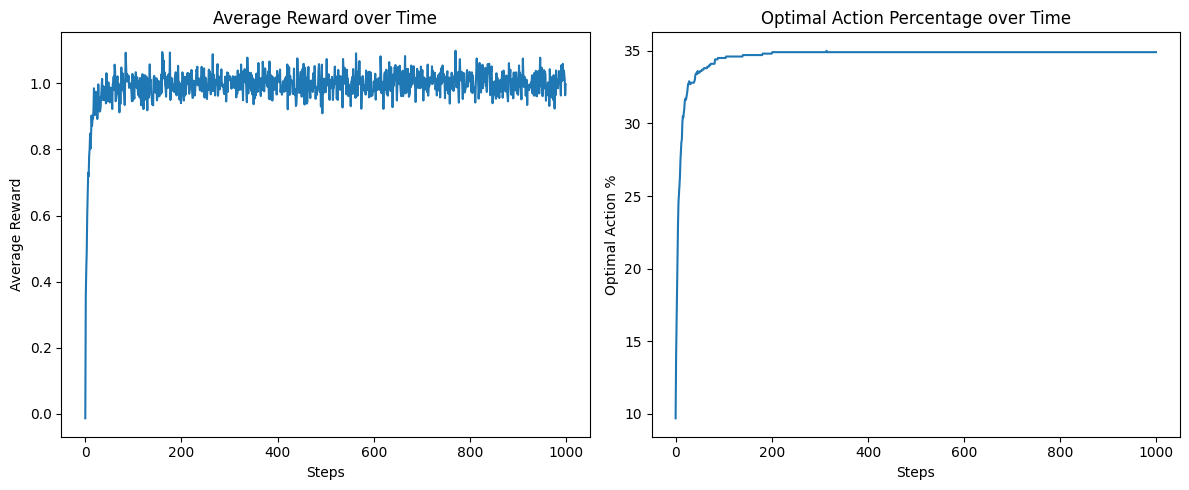

In [58]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, k=10):
        self.k = k
        self.action_values = np.zeros(k)
        self.action_counts = np.zeros(k)
        self.true_means = np.random.normal(0, 1, k)
        self.optimal_action = np.argmax(self.true_means)

    def get_reward(self, action):
        return np.random.normal(self.true_means[action], 1)
    
    def select_action(self):
        return np.argmax(self.action_values)

    def update_action_value(self, action, reward):
        self.action_counts[action] += 1
        self.action_values[action] += (reward - self.action_values[action]) / self.action_counts[action]

def simulate(bandit, steps=1000):
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)
    for step in range(steps):
        action = bandit.select_action()
        reward = bandit.get_reward(action)
        bandit.update_action_value(action, reward)
        rewards[step] = reward
        if action == bandit.optimal_action:
            optimal_action_counts[step] += 1
    return rewards, optimal_action_counts

def run_experiments(k=10, steps=1000, runs=1000):
    avg_rewards = np.zeros(steps)
    optimal_action_percents = np.zeros(steps)
    
    for run in range(runs):
        bandit = Bandit(k)
        rewards, optimal_action_counts = simulate(bandit, steps)
        avg_rewards += rewards
        optimal_action_percents += optimal_action_counts
    
    avg_rewards /= runs
    optimal_action_percents = (optimal_action_percents / runs) * 100
    
    return avg_rewards, optimal_action_percents

def main():
    k = 10
    steps = 1000
    runs = 1000
    avg_rewards, optimal_action_percents = run_experiments(k, steps, runs)
    
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Time')

    plt.subplot(1, 2, 2)
    plt.plot(optimal_action_percents)
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action %')
    plt.title('Optimal Action Percentage over Time')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


# Epsilon Greedy with different choices of Epsilon

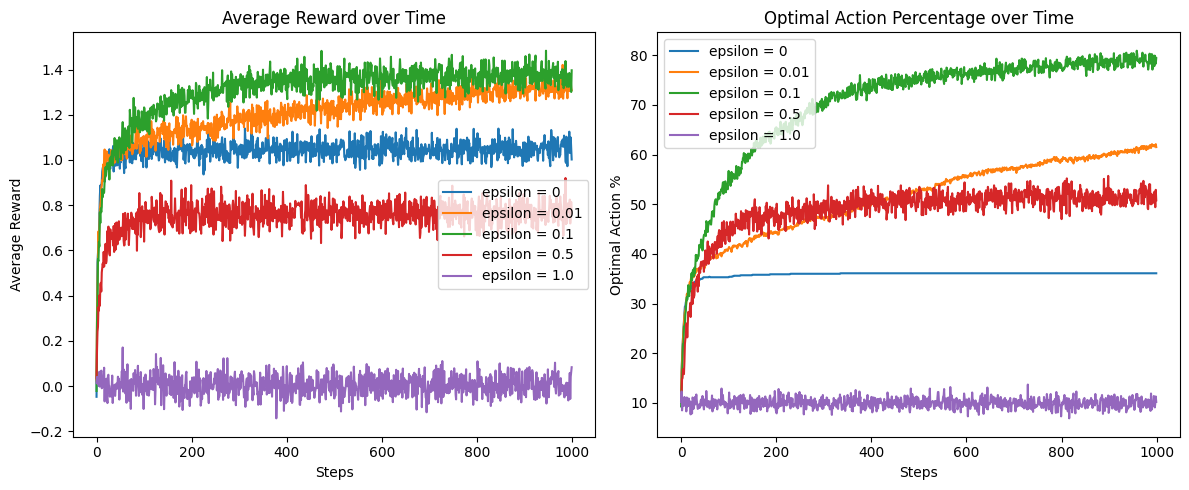

In [59]:
import numpy as np
import matplotlib.pyplot as plt

class EpsilonGreedyBandit:
    def __init__(self, k=10, epsilon=0.1):
        self.k = k
        self.epsilon = epsilon
        self.action_values = np.zeros(k)
        self.action_counts = np.zeros(k)
        self.true_means = np.random.normal(0, 1, k)
        self.optimal_action = np.argmax(self.true_means)

    def get_reward(self, action):
        return np.random.normal(self.true_means[action], 1)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)  # Explore
        else:
            return np.argmax(self.action_values)  # Exploit

    def update_action_value(self, action, reward):
        self.action_counts[action] += 1
        self.action_values[action] += (reward - self.action_values[action]) / self.action_counts[action]

def simulate(bandit, steps=1000):
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)
    for step in range(steps):
        action = bandit.select_action()
        reward = bandit.get_reward(action)
        bandit.update_action_value(action, reward)
        rewards[step] = reward
        if action == bandit.optimal_action:
            optimal_action_counts[step] += 1
    return rewards, optimal_action_counts

def run_experiment(epsilons, k=10, steps=1000, runs=1000):
    avg_rewards = np.zeros((len(epsilons), steps))
    optimal_action_percents = np.zeros((len(epsilons), steps))
    
    for i, epsilon in enumerate(epsilons):
        total_optimal_action_counts = np.zeros(steps)
        for run in range(runs):
            bandit = EpsilonGreedyBandit(k, epsilon)
            rewards, optimal_action_counts = simulate(bandit, steps)
            avg_rewards[i] += rewards
            total_optimal_action_counts += optimal_action_counts
        avg_rewards[i] /= runs
        optimal_action_percents[i] = total_optimal_action_counts / runs
    
    return avg_rewards, optimal_action_percents

def main():
    epsilons = [0, 0.01, 0.1, 0.5, 1.0]  # Different epsilon values for pilot runs
    steps = 1000
    runs = 1000
    avg_rewards, optimal_action_percents = run_experiment(epsilons, steps=steps, runs=runs)
    
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for i, epsilon in enumerate(epsilons):
        plt.plot(avg_rewards[i], label=f'epsilon = {epsilon}')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Time')
    plt.legend()

    plt.subplot(1, 2, 2)
    for i, epsilon in enumerate(epsilons):
        plt.plot(optimal_action_percents[i] * 100, label=f'epsilon = {epsilon}')
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action %')
    plt.title('Optimal Action Percentage over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


# Optimistic Greedy

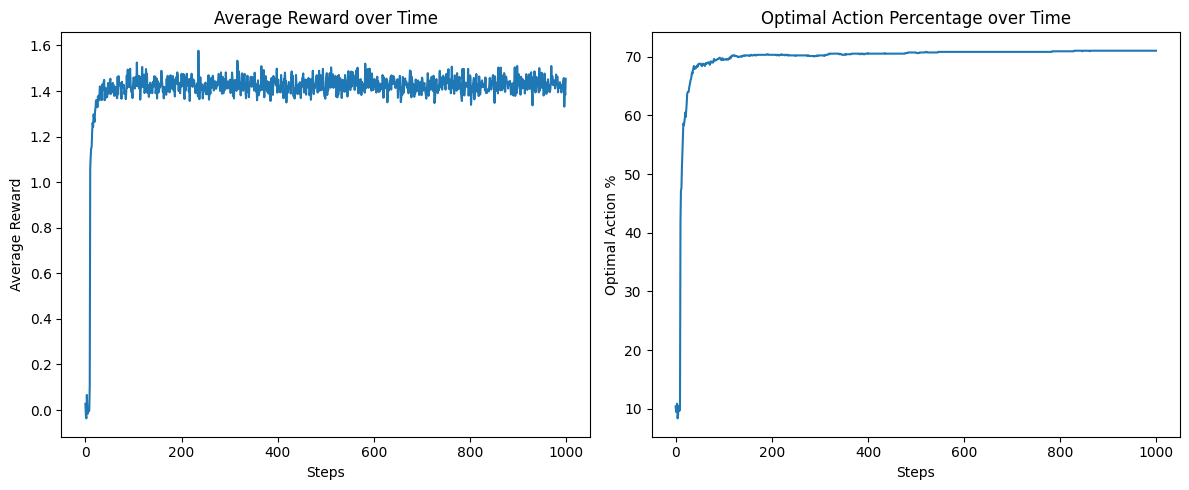

In [60]:
import numpy as np
import matplotlib.pyplot as plt

class OptimisticGreedyBandit:
    def __init__(self, k=10, optimistic_value=5):
        self.k = k
        self.optimistic_value = optimistic_value
        self.true_means = np.random.normal(0, 1, k)
        self.action_values = np.ones(k) * optimistic_value
        self.action_counts = np.zeros(k)
        self.optimal_action = np.argmax(self.true_means)

    def get_reward(self, action):
        return np.random.normal(self.true_means[action], 1)

    def select_action(self):
        return np.argmax(self.action_values)

    def update_action_value(self, action, reward):
        self.action_counts[action] += 1
        self.action_values[action] += (reward - self.action_values[action]) / self.action_counts[action]

def simulate(bandit, steps=1000):
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)
    for step in range(steps):
        action = bandit.select_action()
        reward = bandit.get_reward(action)
        bandit.update_action_value(action, reward)
        rewards[step] = reward
        if action == bandit.optimal_action:
            optimal_action_counts[step] += 1
    return rewards, optimal_action_counts

def run_experiment(k=10, steps=1000, runs=1000, optimistic_value=5):
    avg_rewards = np.zeros(steps)
    optimal_action_percents = np.zeros(steps)
    
    for run in range(runs):
        bandit = OptimisticGreedyBandit(k, optimistic_value)
        rewards, optimal_action_counts = simulate(bandit, steps)
        avg_rewards += rewards
        optimal_action_percents += optimal_action_counts
    
    avg_rewards /= runs
    optimal_action_percents = (optimal_action_percents / runs) * 100
    
    return avg_rewards, optimal_action_percents

def main():
    k = 10
    steps = 1000
    runs = 1000
    optimistic_value = 5  # Set optimistic initial value higher than the expected rewards
    avg_rewards, optimal_action_percents = run_experiment(k, steps, runs, optimistic_value)
    
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Time')

    plt.subplot(1, 2, 2)
    plt.plot(optimal_action_percents)
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action %')
    plt.title('Optimal Action Percentage over Time')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


# Gradient Bandit Problems

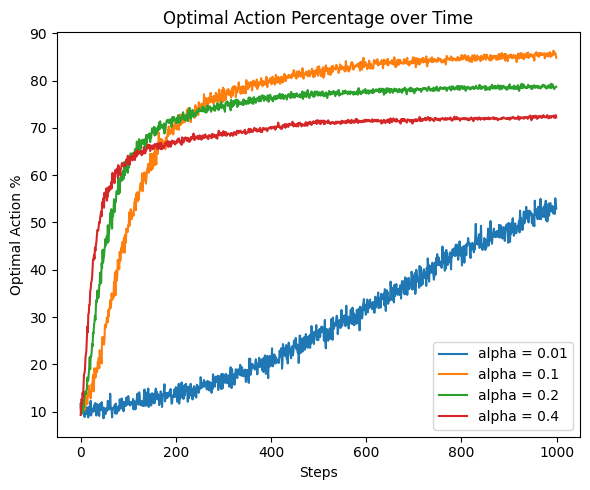

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class GradientBandit:
    def __init__(self, k=10, alpha=0.1):
        self.k = k
        self.alpha = alpha
        self.preferences = np.zeros(k)
        self.action_counts = np.zeros(k)
        self.true_means = np.random.normal(0, 1, k)
        self.average_reward = 0
        self.optimal_action = np.argmax(self.true_means)

    def get_reward(self, action):
        return np.random.normal(self.true_means[action], 1)

    def select_action(self):
        exp_preferences = np.exp(self.preferences)
        action_probabilities = exp_preferences / np.sum(exp_preferences)
        return np.random.choice(self.k, p=action_probabilities)

    def update_preferences(self, action, reward):
        exp_preferences = np.exp(self.preferences)
        action_probabilities = exp_preferences / np.sum(exp_preferences)
        
        self.average_reward += (reward - self.average_reward) / np.sum(self.action_counts + 1)
        self.action_counts[action] += 1

        for a in range(self.k):
            if a == action:
                self.preferences[a] += self.alpha * (reward - self.average_reward) * (1 - action_probabilities[a])
            else:
                self.preferences[a] -= self.alpha * (reward - self.average_reward) * action_probabilities[a]

def simulate(bandit, steps=1000):
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)
    for step in range(steps):
        action = bandit.select_action()
        reward = bandit.get_reward(action)
        bandit.update_preferences(action, reward)
        rewards[step] = reward
        if action == bandit.optimal_action:
            optimal_action_counts[step] += 1
    return rewards, optimal_action_counts

def run_experiment(alphas, k=10, steps=1000, runs=1000):
    avg_rewards = np.zeros((len(alphas), steps))
    optimal_action_percents = np.zeros((len(alphas), steps))
    
    for i, alpha in enumerate(alphas):
        total_optimal_action_counts = np.zeros(steps)
        for run in range(runs):
            bandit = GradientBandit(k, alpha)
            rewards, optimal_action_counts = simulate(bandit, steps)
            avg_rewards[i] += rewards
            total_optimal_action_counts += optimal_action_counts
        avg_rewards[i] /= runs
        optimal_action_percents[i] = (total_optimal_action_counts / runs) * 100
    
    return avg_rewards, optimal_action_percents

def main():
    alphas = [0.01, 0.1, 0.2, 0.4]  # Different alpha values for pilot runs
    steps = 1000
    runs = 1000
    _, optimal_action_percents = run_experiment(alphas, steps=steps, runs=runs)
    
    plt.figure(figsize=(6, 5))

    for i, alpha in enumerate(alphas):
        plt.plot(optimal_action_percents[i], label=f'alpha = {alpha}')
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action %')
    plt.title('Optimal Action Percentage over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
